# Workflow for processing Shapefile Multi-timeline - Arboretum forests

In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.append("..")
sys.path.append('/home/547/aw3463/tmp/install/lib/python3.6/site-packages')

from image_processing import segmentation
import geopandas
import re


import time
start_time = time.time()


output = ''
#
# Don't need this, but leaving it out might break some code somewhere.
#
field_data = ['ARB', '01JAN19', '', '', '', '']

#
# Days which are masked out due to cloud/shadow/haze
#
ls8_bad_days = ['2013-04-18', '2013-05-27', '2013-06-05', '2013-06-12', '2013-06-28', '2013-07-07',
                '2013-07-14', '2013-08-08', '2013-08-15', '2013-09-16', '2013-09-25', '2013-10-27',
                '2013-11-12', '2013-11-28', '2013-12-14', '2013-12-21', '2014-01-22', '2014-03-04',
                '2014-03-11', '2014-03-20', '2014-03-27', '2014-04-21', '2014-04-28', '2014-05-23',
                '2014-05-30', '2014-06-08', '2014-06-15', '2014-06-24', '2014-07-01', '2014-07-10',
                '2014-08-18', '2014-09-12', '2014-11-15', '2014-12-08', '2014-12-24', '2015-01-09',
                '2015-01-18', '2015-01-25', '2015-02-03', '2015-02-19', '2015-02-26', '2015-03-23',
                '2015-04-24', '2015-05-01', '2015-05-10', '2015-05-26', '2015-06-27', '2015-07-04',
                '2015-07-20', '2015-08-14', '2015-10-17', '2015-11-02', '2015-11-18', '2015-11-25',
                '2015-12-20', '2015-12-27', '2016-01-05', '2016-01-21', '2016-01-28', '2016-02-29', '2016-03-09',
                '2016-03-16', '2016-03-25', '2016-04-01', '2016-04-17', '2016-05-12', '2016-05-28', '2016-06-04',
                '2016-06-13', '2016-06-20', '2016-06-29', '2016-07-06', '2016-07-22', '2016-07-31',
                '2016-08-16', '2016-08-23', '2016-09-01', '2016-09-08', '2016-09-17', '2016-09-24',
                '2016-10-03', '2016-10-10', '2016-10-19', '2016-11-11', '2016-12-13', '2016-12-29',
                '2017-01-07', '2017-01-14', '2017-01-23', '2017-01-30', '2017-02-15', '2017-02-24',
                '2017-03-03', '2017-03-12', '2017-04-04', '2017-04-20', '2017-05-22', '2017-06-07',
                '2017-06-16', '2017-07-02', '2017-07-09', '2017-07-18', '2017-07-25', '2017-08-03',
                '2017-08-26', '2017-09-04', '2017-10-13', '2017-11-14', '2017-11-30', '2017-12-25',
                '2018-01-10', '2018-01-26', '2018-02-02', '2018-02-11', '2018-02-18', '2018-02-27',
                '2018-03-06', '2018-03-15', '2018-03-22', '2018-05-18', '2018-05-25', '2018-06-03',
                '2018-07-05', '2018-07-21', '2018-08-22', '2018-09-07', '2018-09-14', '2018-10-09',
                '2018-10-16', '2018-11-01', '2018-11-17', '2018-11-26', '2018-12-12', '2019-01-04',
                '2019-02-05', '2019-02-14', '2019-02-21']
s2a_bad_days = ['2015-09-03', '2015-10-23', '2015-11-12', '2015-11-22', '2015-12-22', '2016-01-31',
                '2016-04-30', '2016-06-09', '2016-06-19', '2016-07-09', '2016-07-19', '2016-07-29',
                '2016-08-28', '2016-09-07', '2016-09-17', '2016-09-27', '2016-10-07', '2016-10-17',
                '2016-11-06', '2016-12-06', '2016-12-16', '2016-12-26', '2017-01-05', '2017-02-04',
                '2017-02-14', '2017-03-16', '2017-04-05', '2017-04-15', '2017-04-25', '2017-05-05',
                '2017-05-25', '2017-06-14',
                '2017-07-14', '2017-07-24', '2017-10-22', '2017-11-11', '2017-12-21', '2017-12-31',
                '2018-01-10', '2018-02-19', '2018-03-21', '2018-03-31', '2018-04-10', '2018-05-10',
                '2018-05-20', '2018-05-30', '2018-06-09', '2018-06-19', '2018-06-29', '2018-08-08',
                '2018-09-07', '2018-10-07', '2018-10-17', '2018-11-06', '2018-11-16', '2018-11-26',
                '2018-12-16', '2019-01-05']
s2b_bad_days = ['2017-07-09', '2017-07-19', '2017-07-29', '2017-08-18', '2017-09-07', '2017-10-27',
                '2017-11-06', '2017-11-16', '2017-12-06', '2017-12-26', '2018-01-15', '2018-02-24',
                '2018-03-06', '2018-03-16', '2018-04-15', '2018-04-25', '2018-05-25', '2018-06-04',
                '2018-06-14', '2018-07-14', '2018-08-13', '2018-08-23', '2018-09-02', '2018-09-12',
                '2018-09-22', '2018-10-12', '2018-12-11', '2018-12-21', '2018-12-31', '2019-02-09',
                '2019-02-19', '2019-03-01']

#
# BOM rain gauge data file
#
rain_dat = '../Weather/IDCJAC0009_070351_1800_Data.csv'

In [2]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube
import fiona

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

fignum = 1

### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite,<BR> shapefile and time between 2013 and present.<BR> One output for each of Landsat 8, Sentinel 2a and 2b.<BR>

In [3]:
lquery = {
             'time': ('2013-01-01', '2118-12-31'),
             'lat': (-35.325, -35.263),
             'lon': (149.039, 149.109),
             'output_crs': 'EPSG:3577',
             'resampling': 'bilinear',
             'group_by': 'solar_day',

            }

#
# Landsat 8
#
lquery['resolution'] = (-25, 25)

dc=datacube.Datacube()

lsarray = dc.load(product='ls8_nbart_scene', **lquery)
lsarray.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red',
                '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
lb_names = ['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2']
print('Loaded Landsat 8 data')

#
# Sentinel 2a/b
#
lquery['resolution']=(-10, 10)

sb_names = ['nbart_coastal_aerosol', 'nbart_blue', 'nbart_green', 'nbart_red', 'nbart_red_edge_1', 'nbart_red_edge_2', 'nbart_red_edge_3', 
           'nbart_nir_1', 'nbart_nir_2', 'nbart_swir_2', 'nbart_swir_3']

s2aarray = dc.load(product='s2a_ard_granule', measurements=sb_names, **lquery)
print('Loaded Sentinel 2A data')

s2barray = dc.load(product='s2b_ard_granule', measurements=sb_names, **lquery)
print('Loaded Sentinel 2B data')


Loaded Landsat 8 data
Loaded Sentinel 2A data
Loaded Sentinel 2B data


In [4]:
filename = '../ShapeFiles/FORESTS/Arboretum_Forest.shp'
fl = fiona.open(filename)

#for feature in fl:
#    print(re.sub('[()" ]', '_', feature['properties']['FOREST_NAM']))

In [5]:
gdf = geopandas.read_file(filename)
gdf_prj = gdf.to_crs(crs={'init': 'EPSG:4326'})

In [6]:
#dc=datacube.Datacube()
lon = (gdf_prj.total_bounds[0], gdf_prj.total_bounds[2])
lat = (gdf_prj.total_bounds[1], gdf_prj.total_bounds[3])

In [7]:
jquery = {
             'time': ('2013-01-01', '2117-07-31'),
             'lat': lat,
             'lon': lon,
             'output_crs': 'EPSG:3577',
             'resampling': 'bilinear',
             'group_by': 'solar_day'
            }

In [8]:
lb_names = ['coastal_aerosol', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2']

jquery['resolution'] = (-25, 25)
j_lsarray = dc.load(product='ls8_nbart_scene', **jquery)

j_lsarray.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red',
                '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
print('Loaded Landsat 8 data')

sb_names = ['nbart_coastal_aerosol', 'nbart_blue', 'nbart_green', 'nbart_red', 'nbart_red_edge_1', 'nbart_red_edge_2', 'nbart_red_edge_3', 
           'nbart_nir_1', 'nbart_nir_2', 'nbart_swir_2', 'nbart_swir_3']

jquery['resolution'] = (-10, 10)
j_s2aarray = dc.load(product='s2a_ard_granule', measurements=sb_names, **jquery)
print('Loaded Sentinel 2A data')

j_s2barray = dc.load(product='s2b_ard_granule', measurements=sb_names, **jquery)
print('Loaded Sentinel 2B data')

Loaded Landsat 8 data
Loaded Sentinel 2A data
Loaded Sentinel 2B data


In [9]:
rast = segmentation.rasterise_vector(filename, shape=(136, 107),
                                     transform=j_lsarray.affine,
                                     crs=j_lsarray.crs.wkt)

In [10]:
seg = segmentation.Segments(rast)

In [11]:
#del df_all
df_all = pd.DataFrame()
for band in lb_names:
    for t in j_lsarray.time:
        data_blob = j_lsarray[band].loc[t].data
        df = pd.DataFrame(seg.basic_statistics(data_blob))
        df['timestamp'] = t.data
        df['band'] = band
        df_all = df_all.append(df)

In [12]:
df_all['date'] = [pd.to_datetime(x).date() for x in df_all.timestamp]
#pd.to_datetime(df_all.timestamp).date()

In [13]:
#df_all.drop(index=df_all[df_all.date==pd.to_datetime(ls8_bad_days[84]).date()].index)
ls8_NoBadDays = df_all.copy()
for i in ls8_bad_days:
    ls8_NoBadDays = ls8_NoBadDays[ls8_NoBadDays.date != pd.to_datetime(i).date()]

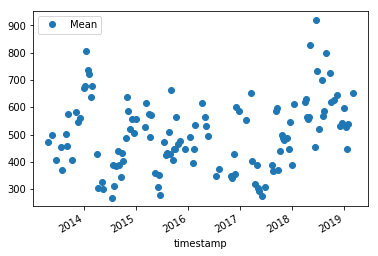

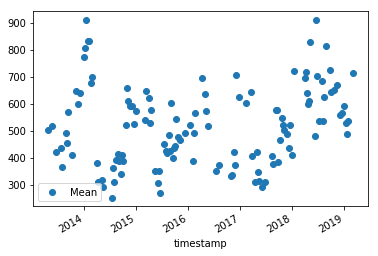

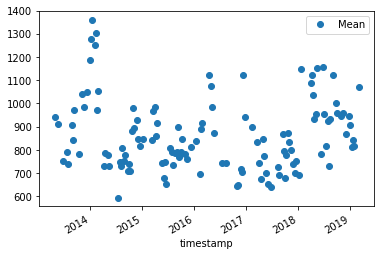

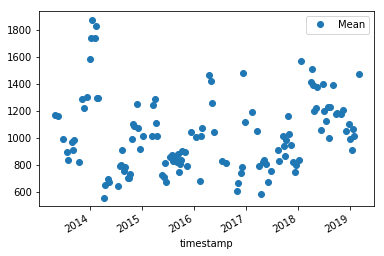

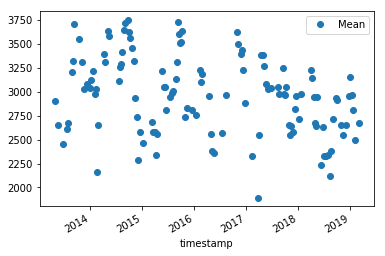

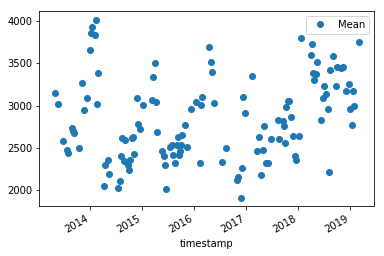

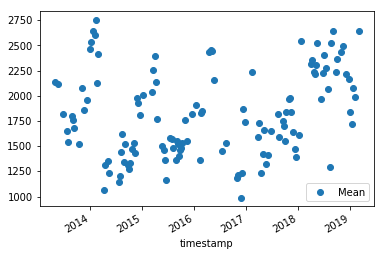

In [14]:
for i in lb_names:
    ls8_NoBadDays[np.logical_and(ls8_NoBadDays['Segment_IDs']==33, ls8_NoBadDays['band']==i)].plot(x='timestamp', y='Mean', style='o')

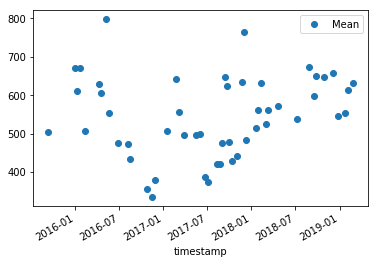

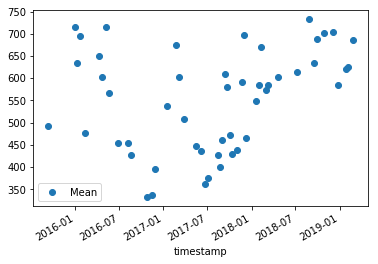

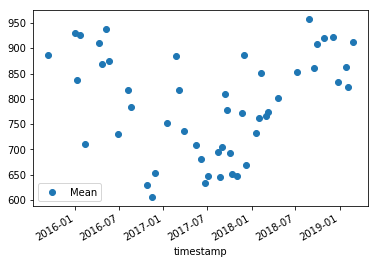

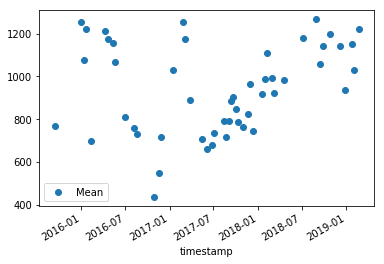

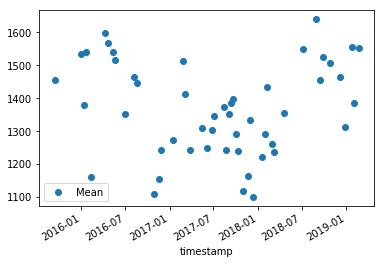

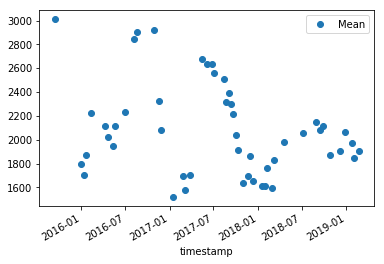

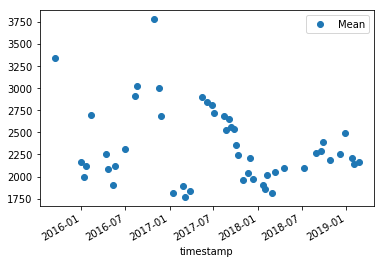

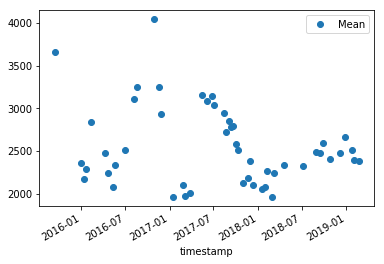

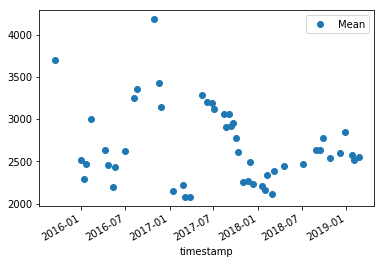

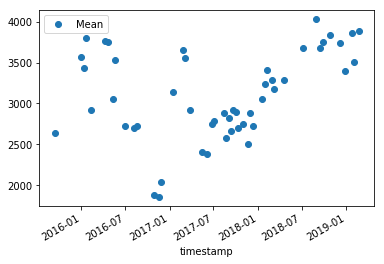

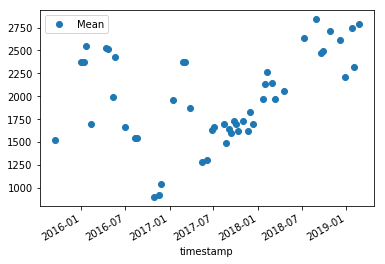

In [24]:
srast = segmentation.rasterise_vector(filename, shape=(136, 107),
                                     transform=j_s2aarray.affine,
                                     crs=j_s2aarray.crs.wkt)

seg = segmentation.Segments(rast)

df_all = pd.DataFrame()
for band in sb_names:
    for t in j_s2aarray.time:
        data_blob = j_s2aarray[band].loc[t].data
        df = pd.DataFrame(seg.basic_statistics(data_blob))
        df['timestamp'] = t.data
        df['band'] = band
        df_all = df_all.append(df)
        
df_all['date'] = [pd.to_datetime(x).date() for x in df_all.timestamp]

s2a_NoBadDays = df_all.copy()
for i in s2a_bad_days:
    s2a_NoBadDays = s2a_NoBadDays[s2a_NoBadDays.date != pd.to_datetime(i).date()]
    
for i in sb_names:
    s2a_NoBadDays[np.logical_and(s2a_NoBadDays['Segment_IDs']==99, s2a_NoBadDays['band']==i)].plot(x='timestamp', y='Mean', style='o')



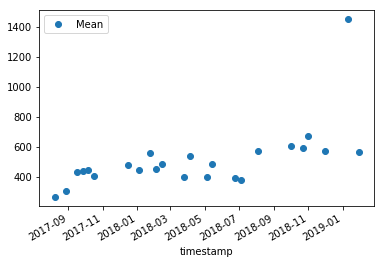

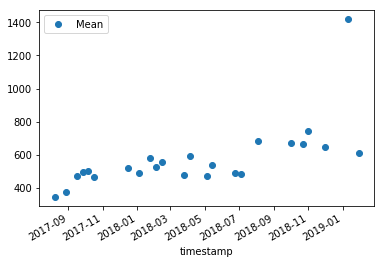

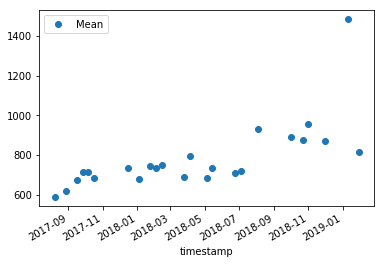

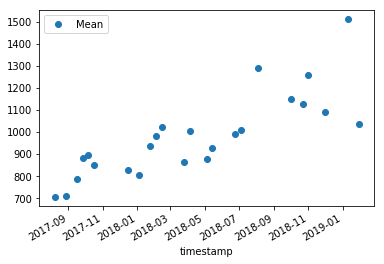

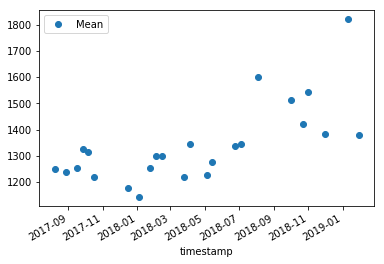

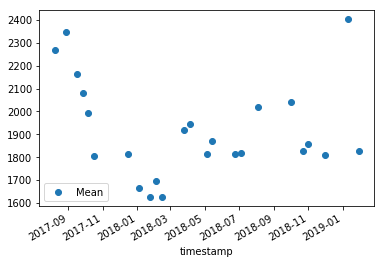

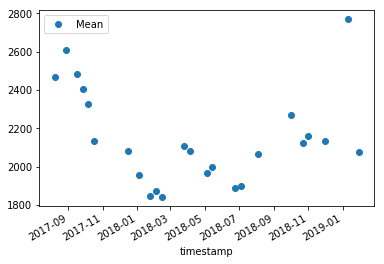

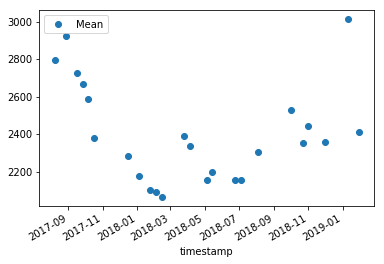

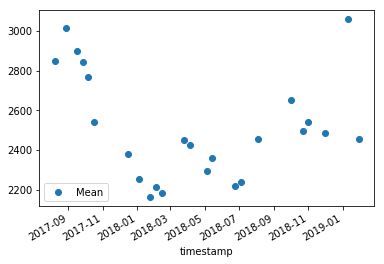

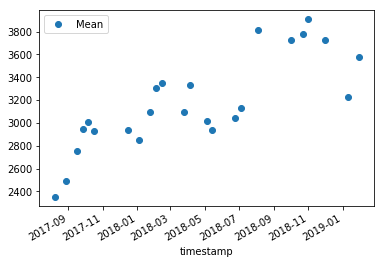

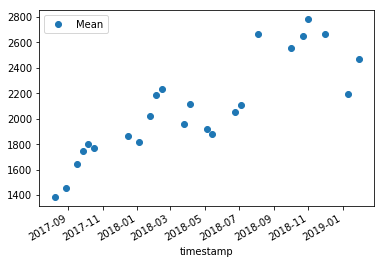

In [25]:
srast = segmentation.rasterise_vector(filename, shape=(136, 107),
                                     transform=j_s2barray.affine,
                                     crs=j_s2barray.crs.wkt)

seg = segmentation.Segments(rast)

df_all = pd.DataFrame()
for band in sb_names:
    for t in j_s2barray.time:
        data_blob = j_s2barray[band].loc[t].data
        df = pd.DataFrame(seg.basic_statistics(data_blob))
        df['timestamp'] = t.data
        df['band'] = band
        df_all = df_all.append(df)
        
df_all['date'] = [pd.to_datetime(x).date() for x in df_all.timestamp]

s2b_NoBadDays = df_all.copy()
for i in s2b_bad_days:
    s2b_NoBadDays = s2b_NoBadDays[s2b_NoBadDays.date != pd.to_datetime(i).date()]
    
for i in sb_names:
    s2b_NoBadDays[np.logical_and(s2b_NoBadDays['Segment_IDs']==99, s2b_NoBadDays['band']==i)].plot(x='timestamp', y='Mean', style='o')



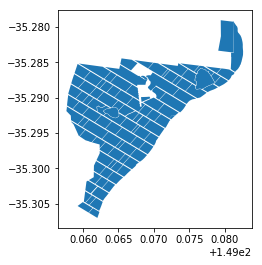

In [17]:
gdf_prj.plot()

# Figure 

### Plot RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


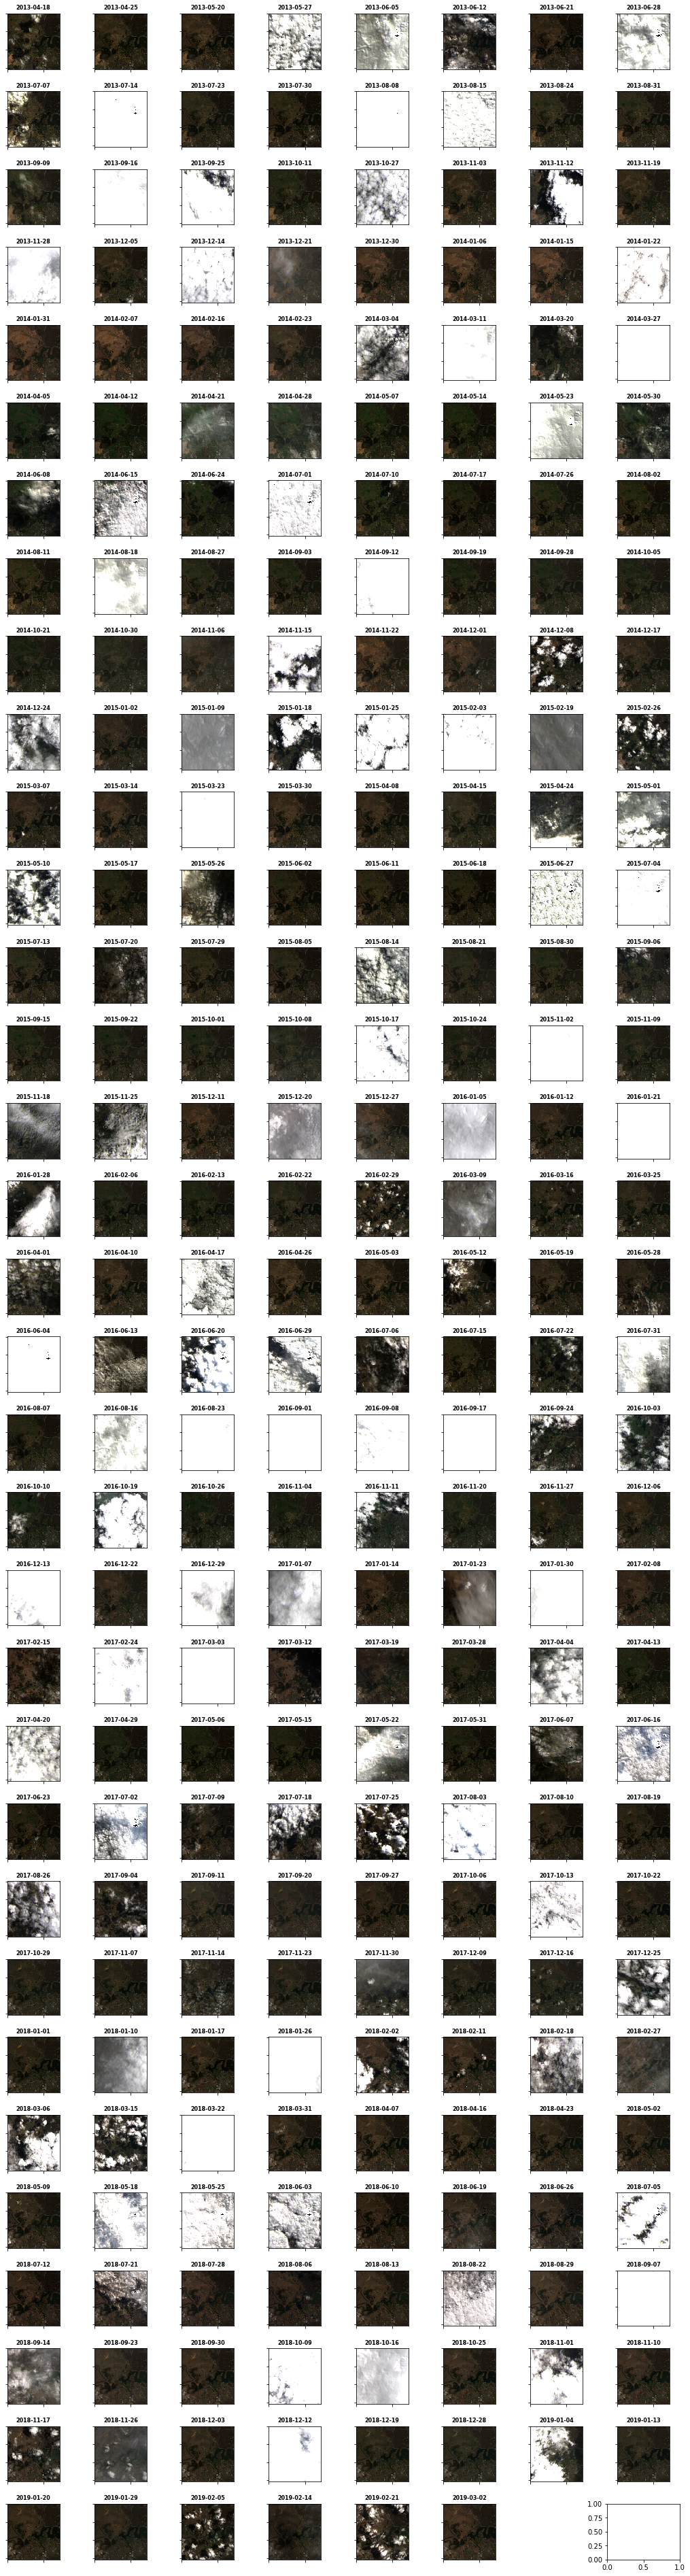

In [18]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(lsarray, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

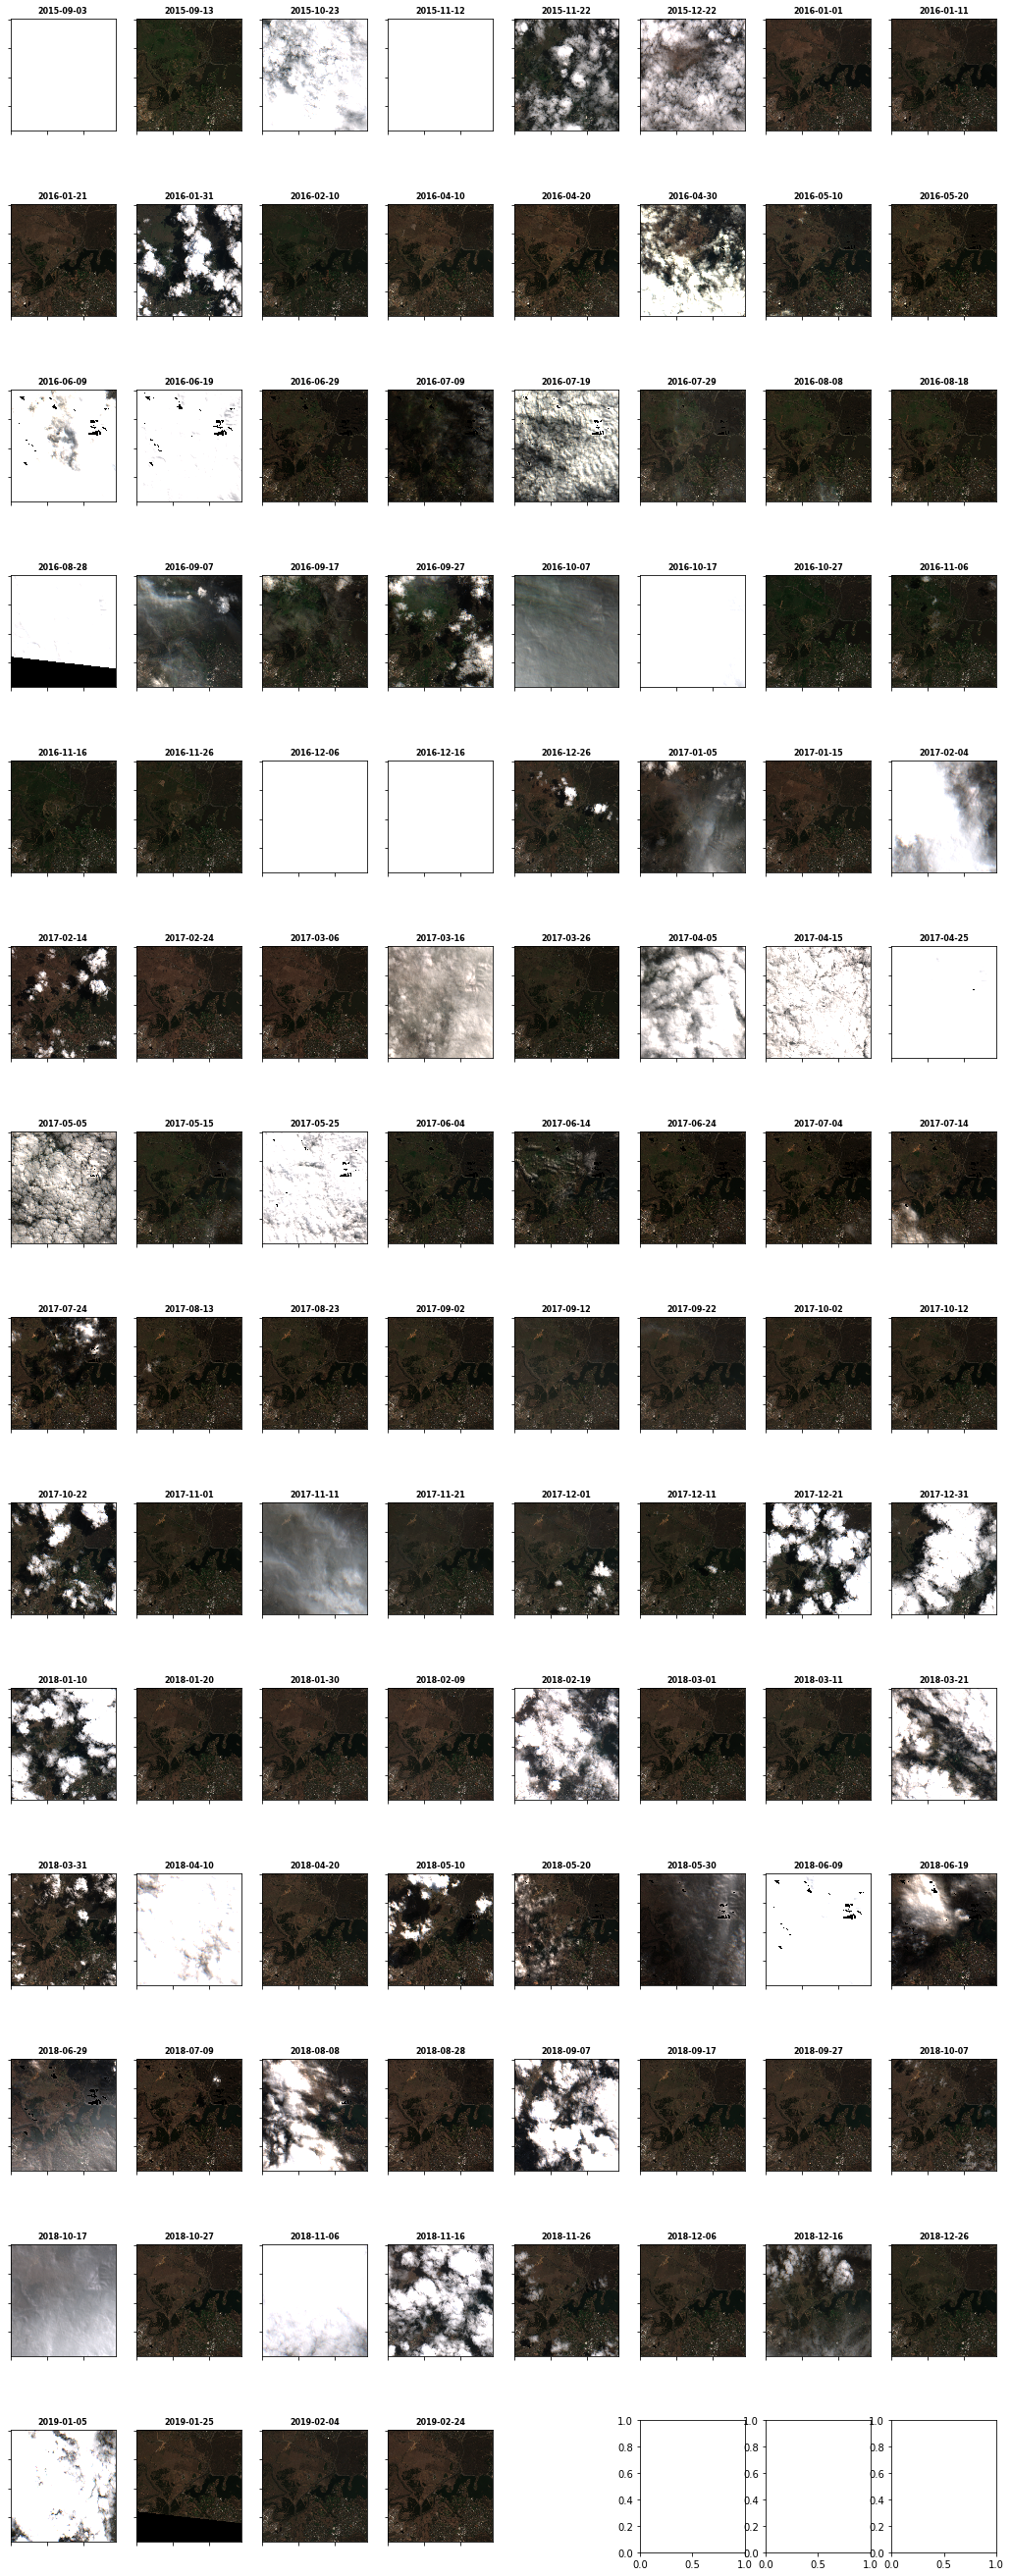

In [19]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2aarray, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

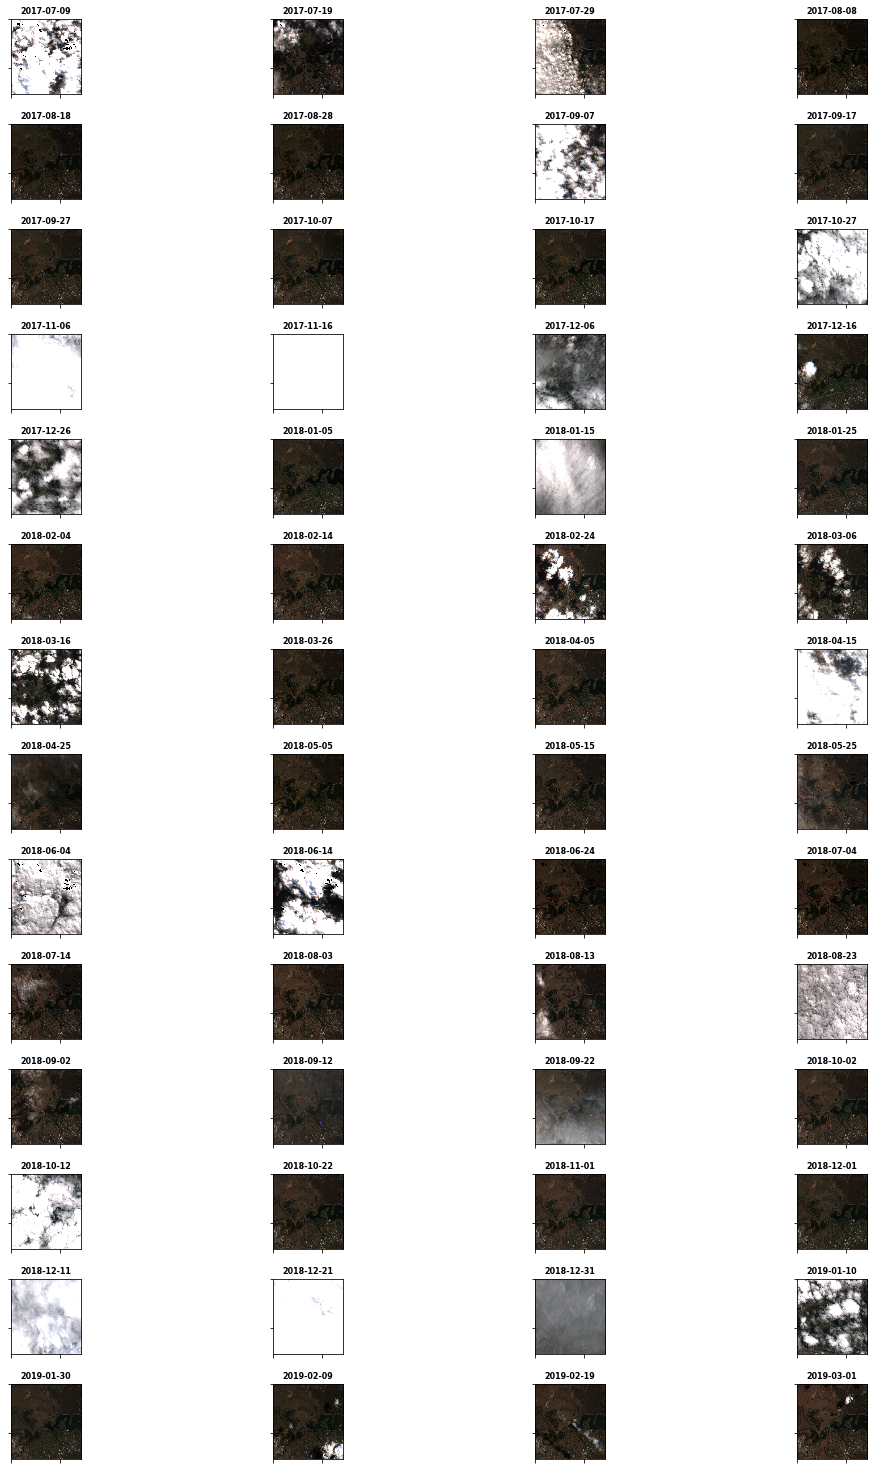

In [20]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2barray, output, field_data, fignum)
fignum += 1

### Create a statistics dataframe, comparing satellite and field data

ground_brdf_ls8 and _s2a need to be set to empty for this workflow

In [21]:
ground_brdf_ls8 = []
ground_brdf_s2a = []
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

NameError: name 'ls8_array' is not defined

# Figure

### Plot spectra of satellite data, on a pixel-by-pixel basis

Each line represents the data from a single overpass.


In [ ]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

In [ ]:
ls8_csvs, sent_csvs = [], []
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [ ]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

In [ ]:
#MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

In [ ]:
#FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
#fignum+=1

In [ ]:
#dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

## How long did this notebook take to run?

In [ ]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")